In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from dataclasses import dataclass
import numpy as np

In [133]:
@dataclass
class Operations:
    convolution: int
    correlation: int
    fft_convolution: int
    fft_correlation: int


operations = Operations(0, 0, 0, 0)

In [134]:
def convolution(first_sequence, second_sequence):
    first_sequence_length = len(first_sequence)
    second_sequence_legth = len(second_sequence)
    out = np.zeros(first_sequence_length + second_sequence_legth - 1)
    
    for i in range(first_sequence_length + second_sequence_legth - 1):
        for j in range(second_sequence_legth):
            if 0 <= i - j < first_sequence_length:
                out[i] += first_sequence[i - j] * second_sequence[j]
                operations.convolution += 1
                
    return out
            

In [135]:
def correlation(first_sequence, second_sequence):
    first_sequence_length = len(first_sequence)
    second_sequence_legth = len(second_sequence)
    out = np.zeros(first_sequence_length + second_sequence_legth - 1)
    
    for i in range(first_sequence_length + second_sequence_legth - 1):
        for j in range(second_sequence_legth):
            if 0 <= i - j < first_sequence_length:
                out[i] += first_sequence[i - j] * second_sequence[-j - 1]
                operations.correlation += 1
                
    return out
     

In [136]:
def fft_convolve(x, h):
    # Размер входных сигналов
    N = len(x)
    M = len(h)

    # Дополнение сигналов до размера, кратного степени 2
    N_fft = 2**int(np.ceil(np.log2(N + M - 1)))
    x_fft = np.fft.fft(x, N_fft)
    h_fft = np.fft.fft(h, N_fft)

    # Умножение в частотной области
    y_fft = x_fft * h_fft

    # Обратное БПФ для получения свертки и округление до действительных значений
    y = np.fft.ifft(y_fft).real
    
    # Сложность алгоритма O(N*log(N)). Суммарная сложность: O((N+M)*log*(N+M))
    operations.fft_convolution = int((N + M) * np.log(N + M))
    
    return y[:N+M-1]

In [137]:
def fft_correlate(x, h):
    # Размер входных сигналов
    N = len(x)
    M = len(h)

    # Дополнение сигналов до размера, кратного степени 2
    N_fft = 2**int(np.ceil(np.log2(N + M - 1)))
    x_fft = np.fft.fft(x, N_fft)
    h_fft = np.fft.fft(h[::-1], N_fft)

    # Умножение в частотной области
    y_fft = x_fft * h_fft

    # Обратное БПФ для получения свертки и округление до действительных значений
    y = np.fft.ifft(y_fft).real
    
    # Сложность алгоритма O(N*log(N)). Суммарная сложность: O((N+M)*log*(N+M))
    operations.fft_correlation = int((N + M) * np.log(N + M))

    return y[:N+M-1]

## Source functions

In [138]:
N = 8
x = np.arange(0, N)
y = list(map(lambda x: np.cos(3 * x), x))
z = list(map(lambda x: np.sin(2 * x), x))

Text(0.5, 1.0, 'y=cos(3x)')

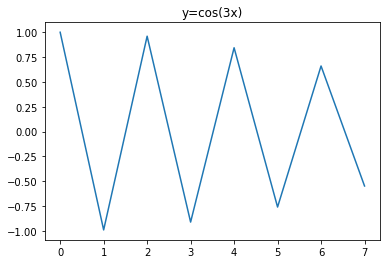

In [139]:
plt.figure(1)
plt.plot(x, y)
plt.title('y=cos(3x)')

Text(0.5, 1.0, 'y=sin(2x)')

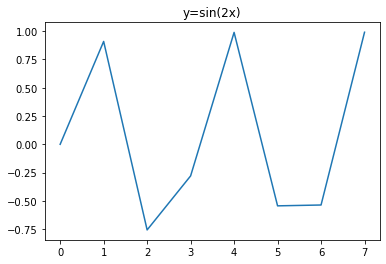

In [140]:
plt.plot(x, z)
plt.title('y=sin(2x)')

## Convolution and Corelation

Text(0.5, 1.0, 'Convolution')

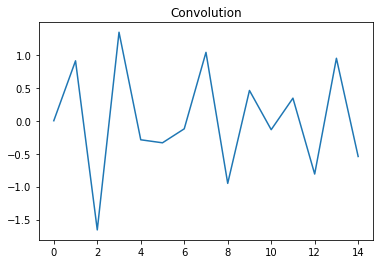

In [141]:
dots = np.delete(np.arange(0, N * 2), -1)
plt.plot(dots, convolution(y, z))
plt.title('Convolution')

Text(0.5, 1.0, 'Correlation')

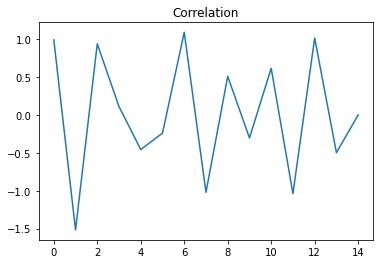

In [142]:
plt.plot(dots, correlation(y, z))
plt.title('Correlation')

## FFT Convolution and Corelation

Text(0.5, 1.0, 'Convolution')

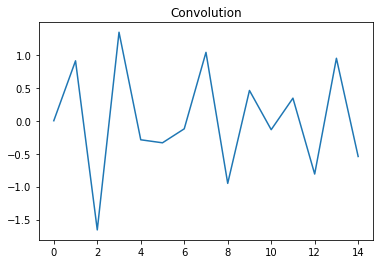

In [143]:
plt.plot(dots, fft_convolve(y, z))
plt.title('Convolution')

Text(0.5, 1.0, 'Correlation')

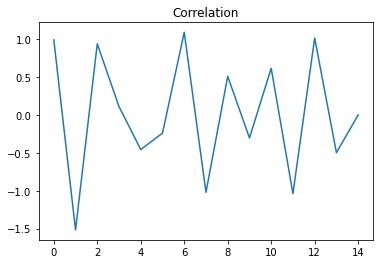

In [144]:
plt.plot(dots, fft_correlate(y, z))
plt.title('Correlation')

In [145]:
print(operations)

Operations(convolution=64, correlation=64, fft_convolution=44, fft_correlation=44)
